# lab1_1 代码部分


库导入

In [6]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import math

定义插值函数构建

In [7]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])

        y=y+l*f(ra[k])
    return sp.simplify(y)


用平均相对误差来评价差值的准确性

可视化

## 问题一

### 拉格朗日插值多项式的次数n越大越好吗？

(1)定义f1(x)
$$
f(x) =  \frac{1}{1+x^2}   
$$

In [8]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return 1/(1+x**2);

设置变量和验证数据列

In [9]:

evals = np.array([0.75,1.75,2.75,3.75,4.75])
# result_L=np.zeros(evals.size)
result_R=np.array([i for i in f1(evals)])

根据不同差值次数n得出结果

n= 5
多项式表达式： 0.00192307692307692*x**4 - 0.0692307692307692*x**2 - 5.55111512312578e-17*x + 0.567307692307692
x: 0.75 估计值: 0.5290 真实值: 0.64 相对误差： 0.1735
x: 1.75 估计值: 0.3733 真实值: 0.2462 相对误差： 0.5166
x: 2.75 估计值: 0.1537 真实值: 0.1168 相对误差： 0.3163
x: 3.75 估计值: -0.0260 真实值: 0.0664 相对误差： 1.3909
x: 4.75 估计值: -0.0157 真实值: 0.0424 相对误差： 1.3708


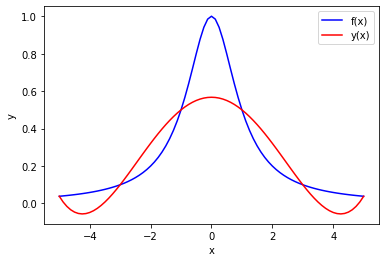

n= 10
多项式表达式： -2.26244343891403e-5*x**10 - 1.53524721689842e-20*x**9 + 0.00126696832579186*x**8 + 1.6940658945086e-20*x**7 - 0.0244117647058824*x**6 + 1.73472347597681e-17*x**5 + 0.19737556561086*x**4 + 6.96057794735694e-17*x**3 - 0.67420814479638*x**2 - 1.52764086103208e-16*x + 1.0
x: 0.75 估计值: 0.6790 真实值: 0.64 相对误差： 0.0609
x: 1.75 估计值: 0.1906 真实值: 0.2462 相对误差： 0.2258
x: 2.75 估计值: 0.2156 真实值: 0.1168 相对误差： 0.8460
x: 3.75 估计值: -0.2315 真实值: 0.0664 相对误差： 4.4864
x: 4.75 估计值: 1.9236 真实值: 0.0424 相对误差： 44.3256


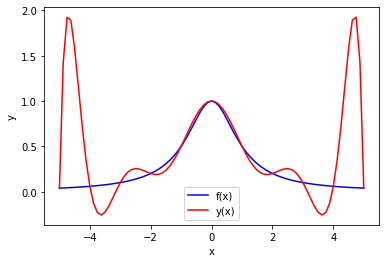

n= 20
多项式表达式： 2.72817068149798e-9*x**20 - 4.66581564268192e-23*x**19 - 2.65314598775676e-7*x**18 - 6.40237794116043e-20*x**17 + 1.07425130797328e-5*x**16 + 5.45155698808788e-18*x**15 - 0.000236412102809867*x**14 - 1.08535413729377e-16*x**13 + 0.00310184793200539*x**12 - 4.4581444655703e-15*x**11 - 0.0251135266738683*x**10 - 1.77814577298485e-15*x**9 + 0.126252909857137*x**8 - 2.23460572962297e-14*x**7 - 0.391630076762947*x**6 + 4.57533316788883e-17*x**5 + 0.753353962815145*x**4 - 8.47477470145019e-15*x**3 - 0.965739184991246*x**2 + 2.76471553983804e-17*x + 1.0
x: 0.75 估计值: 0.6368 真实值: 0.64 相对误差： 0.0051
x: 1.75 估计值: 0.2384 真实值: 0.2462 相对误差： 0.0313
x: 2.75 估计值: 0.0807 真实值: 0.1168 相对误差： 0.3093
x: 3.75 估计值: -0.4471 真实值: 0.0664 相对误差： 7.7337
x: 4.75 估计值: -39.9524 真实值: 0.0424 相对误差： 942.3796


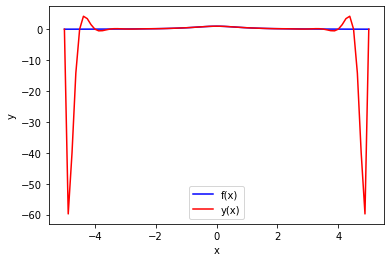

In [10]:
for n in [5,10,20]:
    print("n=",n)
    
    ra=np.linspace(-5,5,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f1,x)
    print("多项式表达式：",y)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):

        js = abs((result_L[i]-result_R[i])/result_R[i])
        print("x:",evals[i],"估计值:",round(result_L[i],4),"真实值:",round(result_R[i],4),"相对误差：",round(js,4))
    rx = np.linspace(-5, 5, 2*40 + 1)
    ry1 = np.array([f1(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 拉格朗日插值多项式的次数n越大越好吗？

(1)定义f2(x)
$$
f(x) =  e^x

$$

In [11]:
def f2(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return np.exp(x)

设置变量和验证数据列

In [12]:

evals = np.array([-0.95,-0.05,0.05,0.95])
# result_L=np.zeros(evals.size)
result_R=np.array([f2(i) for i in evals])

根据不同差值次数n得出结果

n= 5
多项式表达式： 0.00861541066655919*x**5 + 0.0436498882268756*x**4 + 0.166582869717544*x**3 + 0.499410240406725*x**2 + 1.0000029132597*x + 1.00002050618164
x: -0.95 估计值: 0.3868 真实值: 0.3867 相对误差： 0.0001477137
x: -0.05 估计值: 0.9512 真实值: 0.9512 相对误差： 1.98780e-5
x: 0.05 估计值: 1.0513 真实值: 1.0513 相对误差： 1.82437e-5
x: 0.95 估计值: 2.5858 真实值: 2.5857 相对误差： 2.89628e-5


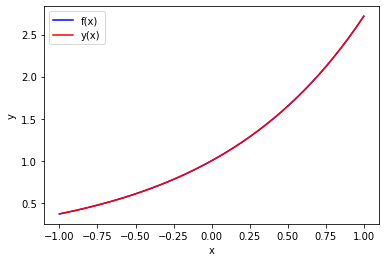

n= 10
多项式表达式： 2.80203316549432e-7*x**10 + 2.81136410507088e-6*x**9 + 2.47981352572424e-5*x**8 + 0.000198371189739532*x**7 + 0.0013888899215857*x**6 + 0.00833334575544598*x**5 + 0.0416666665523096*x**4 + 0.166666665295964*x**3 + 0.500000000003148*x**2 + 1.00000000003747*x + 1.0
x: -0.95 估计值: 0.3867 真实值: 0.3867 相对误差： 5.e-10
x: -0.05 估计值: 0.9512 真实值: 0.9512 相对误差： 0.0
x: 0.05 估计值: 1.0513 真实值: 1.0513 相对误差： 0.0
x: 0.95 估计值: 2.5857 真实值: 2.5857 相对误差： 1.e-10


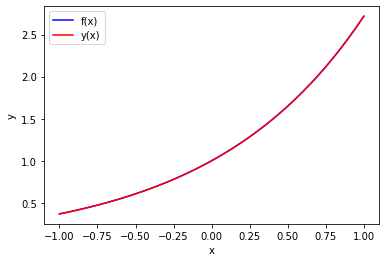

n= 20
多项式表达式： -8.13565748103429e-9*x**20 + 4.20595824834891e-9*x**19 - 4.82777977595106e-8*x**18 + 1.19896867545322e-7*x**17 - 5.44203430763446e-7*x**16 + 4.39896211901214e-7*x**15 + 7.50742401578464e-8*x**14 - 1.43386387208011e-7*x**13 + 5.52868414160912e-7*x**12 - 5.67112692806404e-7*x**11 + 6.11651444160088e-7*x**10 + 2.71032416776507e-6*x**9 + 2.48604811972086e-5*x**8 + 0.00019841482450289*x**7 + 0.00138889185378099*x**6 + 0.00833333312242956*x**5 + 0.0416666666805803*x**4 + 0.166666666667044*x**3 + 0.500000000000113*x**2 + 1.00000000000001*x + 1.0
x: -0.95 估计值: 0.3867 真实值: 0.3867 相对误差： 1.2861e-6
x: -0.05 估计值: 0.9512 真实值: 0.9512 相对误差： 0.0
x: 0.05 估计值: 1.0513 真实值: 1.0513 相对误差： 0.0
x: 0.95 估计值: 2.5857 真实值: 2.5857 相对误差： 5.14e-8


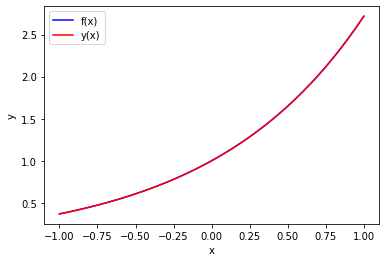

In [16]:
for n in [5,10,20]:
    print("n=",n)
    
    ra=np.linspace(-1,1,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f2,x)
    print("多项式表达式：",y)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        js = abs((result_L[i]-result_R[i])/result_L[i])
        print("x:",evals[i],"估计值:",round(result_L[i],4),"真实值:",round(result_R[i],4),"相对误差：",round(js,10))

    rx=np.linspace(-1,1,2*20+1)
    
    ry1 = np.array([f2(i) for i in rx])
    
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()